# Source of The Dataset
* Own dataset

In [1]:
# loadin important libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# read the dataset 

df = pd.read_csv('Depression.csv')
df.columns = [c.strip() for c in df.columns]
df.columns = [c.lower().replace(' ', '_') for c in df.columns]
print(df.shape)
df.head()

(754, 35)


,mood,age,gender,subject,semester,sibilings,living,employment,personality,relationship,...,meditation,video_games,study_hours,phone_hours,medication,movies_per_week,music_hours,depression,category,verdict
0,Tensed,24,Female,Engineering,9,3,With family,Part time,Extrovert,In a relationship,...,Not at all,Not at all,2,6 to 8,No,0,0,18,Moderate,Yes
1,Tensed,23,Male,Engineering,11,3,With family,None,Ambivert,Single,...,Sometimes,Sometimes,4,0 to 2,No,5,0,1,None,No
2,Sad,19,Female,Pharmacy,3,0,With family,None,Ambivert,Single,...,Not at all,Not at all,3,6 to 8,No,0,0,21,Severe,Yes
3,Lost,23,Female,Engineering,13,1,With family,None,Introvert,In a relationship,...,Not at all,Very Often,1,0 to 2,No,5,0,23,Severe,Yes
4,Lost,22,Male,Engineering,11,1,With family,None,Ambivert,Single,...,Not at all,Very Often,2,6 to 8,No,1,4,19,Moderate,Yes


In [3]:
for cols in df.columns:
    unique_vals = df[cols].unique()
    if len(unique_vals) <= 10:
        print("Feature ", cols, " has ", len(unique_vals), " unique values ----> ", unique_vals)
    else:
        print("Feature ", cols, " has ", len(unique_vals), " unique values")

Feature  mood  has  5  unique values ---->  ['Tensed' 'Sad' 'Lost' 'Happy' 'Angry']
Feature  age  has  16  unique values
Feature  gender  has  3  unique values ---->  ['Female' 'Male' 'Others']
Feature  subject  has  69  unique values
Feature  semester  has  22  unique values
Feature  sibilings  has  12  unique values
Feature  living  has  2  unique values ---->  ['With family' 'Without family']
Feature  employment  has  3  unique values ---->  ['Part time' 'None' 'Full time']
Feature  personality  has  3  unique values ---->  ['Extrovert' 'Ambivert' 'Introvert']
Feature  relationship  has  5  unique values ---->  ['In a relationship' 'Single' 'Engaged' 'Divorced' 'Married']
Feature  wakeup  has  75  unique values
Feature  breakfast  has  68  unique values
Feature  launch  has  58  unique values
Feature  dinner  has  27  unique values
Feature  sleep  has  65  unique values
Feature  hobbies  has  178  unique values
Feature  smoker  has  2  unique values ---->  ['No' 'Yes']
Feature  alco

# Data Visualization

<AxesSubplot:xlabel='gender', ylabel='depression'>

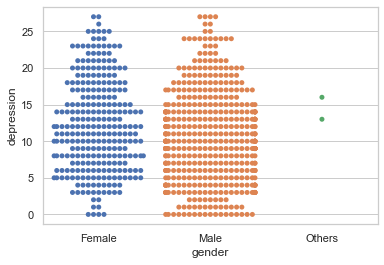

In [4]:
sns.set_theme(style="whitegrid")
sns.swarmplot(y = 'depression', x = 'gender', data = df)

<AxesSubplot:xlabel='depression', ylabel='Proportion'>

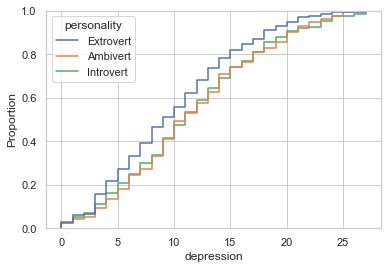

In [5]:
sns.ecdfplot(x = 'depression', data = df, hue = 'personality')

<AxesSubplot:xlabel='depression', ylabel='Count'>

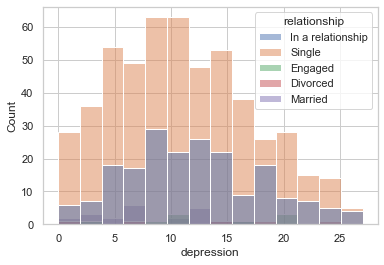

In [6]:
sns.histplot(x = 'depression', data = df, hue = 'relationship')

In [7]:
import collections

a = df['category']
counter = collections.Counter(a)
print(counter)
values = counter.values()
print(values)
keys = counter.keys()
print(keys)
print(counter.most_common(3))
print(dict(counter))

Counter({'Moderate': 543, 'None': 121, 'Severe': 90})
dict_values([543, 121, 90])
dict_keys(['Moderate', 'None', 'Severe'])
[('Moderate', 543), ('None', 121), ('Severe', 90)]
{'Moderate': 543, 'None': 121, 'Severe': 90}


([<matplotlib.patches.Wedge at 0x1a6e3657430>,
 [Text(-0.7015901314352656, 0.847213838102664, 'Moderate'),
  Text(0.34253313520672285, -1.0453090697422716, 'None'),
  Text(1.0235620162036074, -0.40289055459914463, 'Severe')],
 [Text(-0.38268552623741753, 0.46211663896508937, '72.0%'),
  Text(0.18683625556730335, -0.5701685834957844, '16.0%'),
  Text(0.5583065542928767, -0.21975848432680614, '11.9%')])

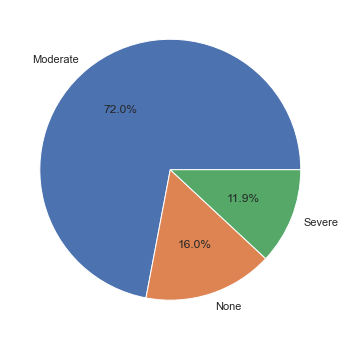

In [8]:
plt.rcParams["figure.figsize"] = (8, 6)
plt.pie(values, labels=keys, autopct='%1.1f%%')

# Data Pre-Processing Phase

In [9]:
df = df[['semester', 'friends', 'age', 'study_hours', 'music_hours', 'phone_hours', 'hangout', 'social_events', 'category']]

In [10]:
# checing for null values

print(df.shape)
df.isnull().sum()

(754, 9)


semester         0
friends          0
age              0
study_hours      0
music_hours      0
phone_hours      0
hangout          0
social_events    0
category         0
dtype: int64

In [11]:
# remove null and uplicate entries

df.dropna(inplace = True)

# remove duplicate entries, if any

df.drop_duplicates(inplace = True)

print(df.shape)
df.describe()

(753, 9)


,semester,friends,age,study_hours,music_hours
count,753.000000,753.000000,753.000000,753.000000,753.000000
mean,7.962815,3.500664,22.539177,2.794157,1.722444
std,4.812019,2.717225,1.992371,2.198614,1.872602
min,1.000000,0.000000,17.000000,0.000000,0.000000
25%,5.000000,2.000000,21.000000,1.000000,1.000000
50%,8.000000,3.000000,22.000000,2.000000,1.000000
75%,11.000000,5.000000,24.000000,4.000000,2.000000
max,83.000000,15.000000,33.000000,10.000000,10.000000


In [12]:
# observe dataset

for cols in df.columns:
    print(str(df[cols].value_counts()) + '\n')

5     108
11     94
12     85
8      68
10     56
1      47
4      46
7      40
2      39
9      37
6      35
13     30
3      27
14     20
15      9
16      5
17      2
19      1
20      1
21      1
23      1
83      1
Name: semester, dtype: int64

3     143
2     128
5     106
0     102
4      93
1      61
6      37
10     25
7      23
8      16
11      5
15      5
9       4
12      4
13      1
Name: friends, dtype: int64

22    144
23    143
21    132
24    116
25     80
20     73
19     21
26     17
18     10
27      6
28      3
29      2
30      2
33      2
17      1
31      1
Name: age, dtype: int64

1     166
2     149
3     122
4      88
0      82
5      67
6      37
10     18
7      11
8       9
9       4
Name: study_hours, dtype: int64

1     292
0     172
2     128
3      59
4      37
5      25
6      13
7      12
10      7
8       5
9       3
Name: music_hours, dtype: int64

3 to 5         298
6 to 8         184
more than 8    167
0 to 2         104
Name: phone_hours, dtype

In [13]:
# converting ordinal categorical values to numerical values

df['hangout'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['social_events'].replace({'Not at all':0, 'Sometimes':1, 'Often':2, 'Very Often':3}, inplace = True)
df['phone_hours'].replace({'0 to 2': 0, '3 to 5': 1, '6 to 8':2, 'more than 8':3}, inplace = True)

In [14]:
# Hobbies has multiple values, splitting hobbies in multiple columns

# df['hobbies'] = df['hobbies'].str.lower()
# df['hobbies'] = df['hobbies'].str.strip()
# df['hobbies'] = df['hobbies'].str.replace(', ', ',')
# df['hobbies'] = df['hobbies'].str.replace(' , ', ',')
# df['hobbies'] = df['hobbies'].str.replace(' ,', ',')
# for idx, row in df.iterrows():
#     for hobby in row.hobbies.split(","):
#         df.loc[idx, hobby] = 1
# df.fillna(0, inplace=True)
# df = df.drop(columns = ['hobbies'])

# renaming the columns

# df.columns = [c.strip() for c in df.columns]
# df.columns = [c.lower().replace(' ', '_') for c in df.columns]

print(df.shape)
df.head()

(753, 9)


,semester,friends,age,study_hours,music_hours,phone_hours,hangout,social_events,category
0,9,2,24,2,0,2,1,3,Moderate
1,11,4,23,4,0,0,2,1,None
2,3,4,19,3,0,2,1,1,Severe
3,13,1,23,1,0,0,0,0,Severe
4,11,5,22,2,4,2,1,1,Moderate


In [15]:
# movies_per_week columns has invalid values, selecting rows only with numeric values

# df = df[df['movies_per_week'].astype(str).str.isdigit()]
# df['movies_per_week'].value_counts()

<AxesSubplot:xlabel='category', ylabel='age'>

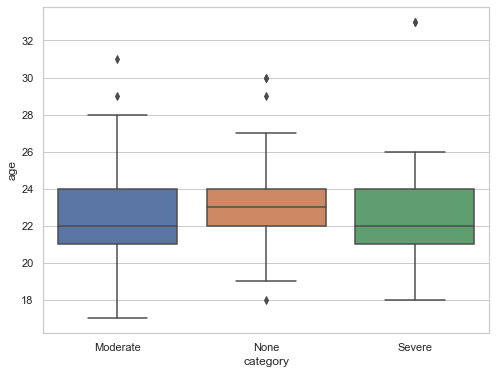

In [16]:
sns.boxplot(x='category', y='age', data=df)

<AxesSubplot:xlabel='category', ylabel='semester'>

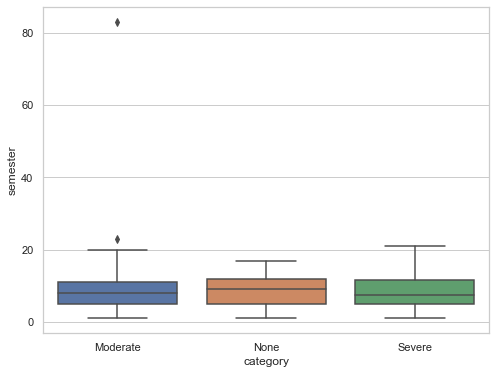

In [17]:
sns.boxplot(x='category', y='semester', data=df)

<AxesSubplot:xlabel='category', ylabel='friends'>

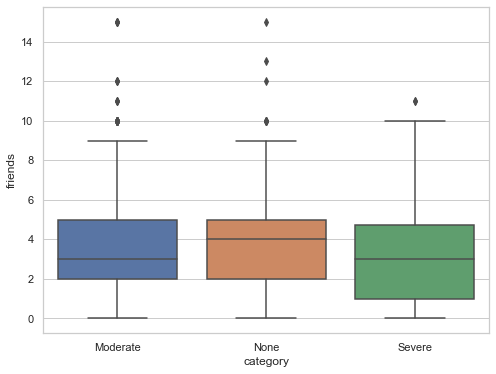

In [18]:
sns.boxplot(x='category', y='friends', data=df)

In [19]:
# settin limits for for outliers from boxplot

limit = {
    'age': 28,
    'semester': 20,
    'friends': 9,
}

# drop rows where limit exceed for features
for feature in limit:
    index = df.index[df[feature] > limit[feature]].tolist()
    df.drop(index = index, inplace = True)
    
print(df.shape)

(704, 9)


In [20]:
# selecting categorical features

cat_features = df.select_dtypes(exclude='number').columns.tolist()
cat_features.remove('category')  # target column for category prediction
cat_features

[]

In [21]:
# convert categorical values to numeric representation

df = pd.get_dummies(data = df, columns = cat_features)
df.head()

,semester,friends,age,study_hours,music_hours,phone_hours,hangout,social_events,category
0,9,2,24,2,0,2,1,3,Moderate
1,11,4,23,4,0,0,2,1,None
2,3,4,19,3,0,2,1,1,Severe
3,13,1,23,1,0,0,0,0,Severe
4,11,5,22,2,4,2,1,1,Moderate


In [22]:
df.describe()

,semester,friends,age,study_hours,music_hours,phone_hours,hangout,social_events
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,7.779830,3.071023,22.441761,2.816761,1.713068,1.558239,1.367898,1.130682
std,3.870756,2.068682,1.822732,2.220864,1.861506,0.983225,0.841419,0.856717
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,8.000000,3.000000,22.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,11.000000,5.000000,24.000000,4.000000,2.000000,2.000000,2.000000,1.000000
max,20.000000,9.000000,28.000000,10.000000,10.000000,3.000000,3.000000,3.000000


# Feature Scaling

In [23]:
# feature-target splitting

X = df.drop(columns = ['category', ]) # X contains the features 
y = df['category']  # y contains target
print(X.shape)
X.head()

(704, 8)


,semester,friends,age,study_hours,music_hours,phone_hours,hangout,social_events
0,9,2,24,2,0,2,1,3
1,11,4,23,4,0,0,2,1
2,3,4,19,3,0,2,1,1
3,13,1,23,1,0,0,0,0
4,11,5,22,2,4,2,1,1


In [24]:
X.describe()

,semester,friends,age,study_hours,music_hours,phone_hours,hangout,social_events
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000
mean,7.779830,3.071023,22.441761,2.816761,1.713068,1.558239,1.367898,1.130682
std,3.870756,2.068682,1.822732,2.220864,1.861506,0.983225,0.841419,0.856717
min,1.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,8.000000,3.000000,22.000000,2.000000,1.000000,1.000000,1.000000,1.000000
75%,11.000000,5.000000,24.000000,4.000000,2.000000,2.000000,2.000000,1.000000
max,20.000000,9.000000,28.000000,10.000000,10.000000,3.000000,3.000000,3.000000


In [25]:
scale_vars = []
for cols in X.columns:
    if X[cols].dtype == np.int64 and X[cols].max() > 1:
        scale_vars.append(cols)
scale_vars

['semester',
 'friends',
 'age',
 'study_hours',
 'music_hours',
 'phone_hours',
 'hangout',
 'social_events']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 20)
print(X_train.shape)
print(X_test.shape)
X_train.head()

(598, 8)
(106, 8)


,semester,friends,age,study_hours,music_hours,phone_hours,hangout,social_events
98,6,3,24,5,1,3,1,1
724,4,5,21,1,1,2,1,1
188,2,5,25,6,1,0,1,1
303,12,2,23,7,8,0,2,2
496,7,3,22,2,1,1,2,1


In [27]:
# # Using SMOTE

# from imblearn.over_sampling import SMOTE, RandomOverSampler
# smt = SMOTE(random_state=12)
# print(collections.Counter(y_train))
# X_train, y_train = smt.fit_resample(X_train, y_train)
# print(collections.Counter(y_train))

# print(collections.Counter(y_train))
# ros = RandomOverSampler(random_state=42)
# X_train, y_train = ros.fit_resample(X_train, y_train)
# print(collections.Counter(y_train))

In [28]:
# using min_max scaler to scale features

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train[scale_vars])
X_train[scale_vars] = scaler.transform(X_train[scale_vars])
X_test[scale_vars] = scaler.transform(X_test[scale_vars])

In [29]:
X_train.head()

,semester,friends,age,study_hours,music_hours,phone_hours,hangout,social_events
98,0.263158,0.333333,0.636364,0.5,0.1,1.000000,0.333333,0.333333
724,0.157895,0.555556,0.363636,0.1,0.1,0.666667,0.333333,0.333333
188,0.052632,0.555556,0.727273,0.6,0.1,0.000000,0.333333,0.333333
303,0.578947,0.222222,0.545455,0.7,0.8,0.000000,0.666667,0.666667
496,0.315789,0.333333,0.454545,0.2,0.1,0.333333,0.666667,0.333333


In [30]:
X_test.head()

,semester,friends,age,study_hours,music_hours,phone_hours,hangout,social_events
413,0.052632,0.000000,0.363636,0.2,0.1,1.000000,0.333333,1.000000
538,0.578947,0.000000,0.727273,0.0,0.0,0.666667,0.333333,0.666667
426,0.000000,0.444444,0.272727,0.3,0.5,0.333333,0.333333,0.000000
450,0.315789,0.333333,0.636364,0.1,0.0,0.333333,0.333333,0.666667
11,0.473684,0.333333,0.545455,0.4,0.2,0.333333,0.333333,0.666667


# Feature Selection

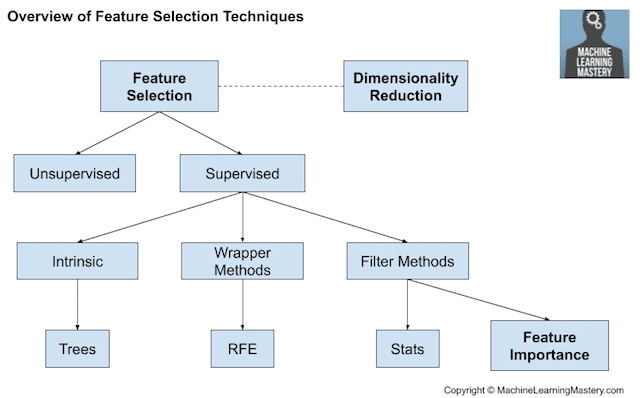

In [31]:
from PIL import Image
from IPython.display import display, Image
display(Image(filename='feature-selection-techniques.jpg'))

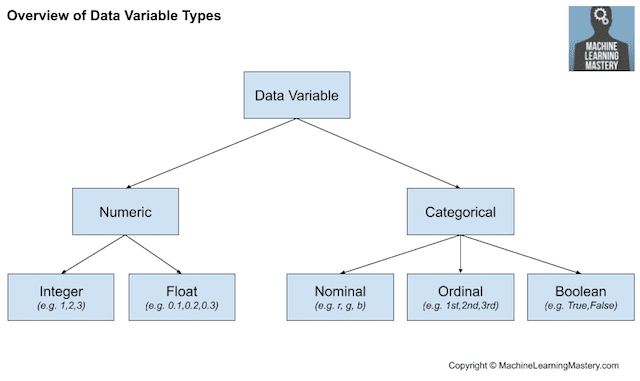

In [32]:
display(Image(filename='data-variable-types.jpg'))

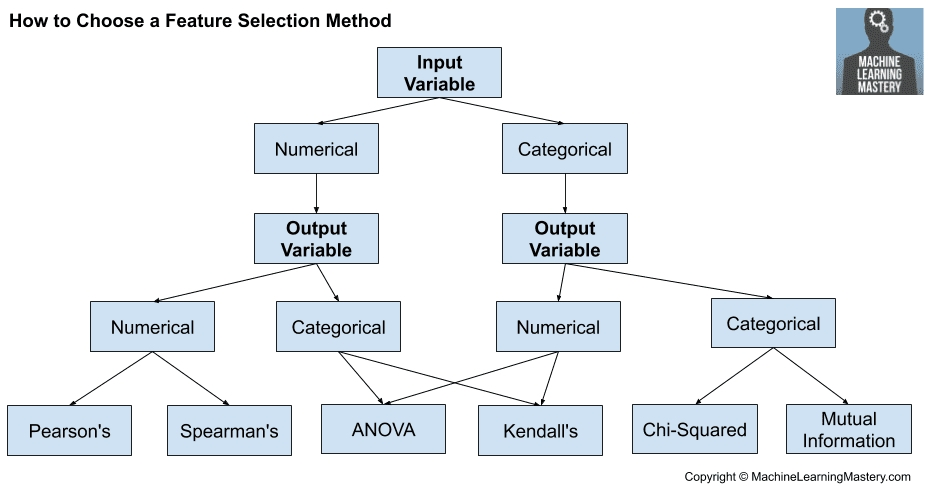

In [33]:
display(Image(filename='how-to-choose.jpg'))

## Applying Filter Methods

In [34]:
# Zero Variance

featuresWithZeroVariance = []
for cols in X_train.columns:
    unique_vals = X_train[cols].unique()
    if len(unique_vals) == 1:
        featuresWithZeroVariance.append(cols)
X_train = X_train.drop(columns = featuresWithZeroVariance)
X_test = X_test.drop(columns = featuresWithZeroVariance)
featuresWithZeroVariance

[]

<AxesSubplot:>

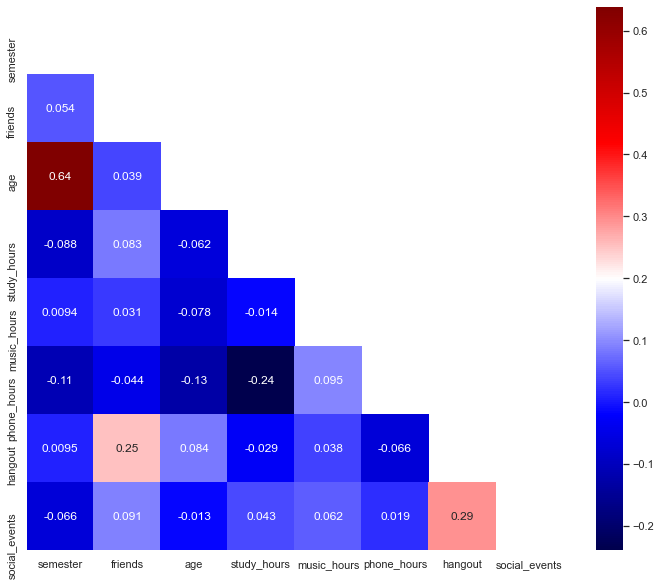

In [35]:
# Pearson's Correlation Coefficient

corr = X_train.corr()
mask1 = np.triu(np.ones_like(corr, dtype=bool))
mask2 = np.tril(np.ones_like(corr, dtype=bool))
plt.figure(figsize = (12,10))
sns.heatmap(corr, annot = True, cmap = "seismic", mask = mask1)

In [36]:
# with the following function we can select highly correlated features
# it will remove the first feature that is highly correlated with another feature

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if(abs(corr_matrix.iloc[i, j])) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [37]:
corr_features = correlation(X_train, 0.85) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

0
set()


In [38]:
X_train = X_train.drop(columns = corr_features)
X_test = X_test.drop(columns = corr_features)

print(X_train.shape)
print(X_test.shape)

(598, 8)
(106, 8)


## Applying Intrinsic Methods

        Features  Importances
6        hangout     0.079893
7  social_events     0.080079
5    phone_hours     0.088688
4    music_hours     0.128495
2            age     0.136066
3    study_hours     0.151027
1        friends     0.155491
0       semester     0.180260


<AxesSubplot:>

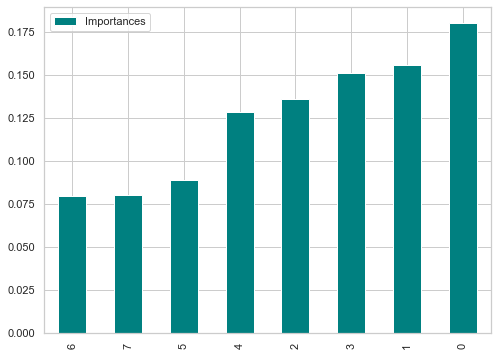

In [39]:
# Random Forest Importrance

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=3400)

model.fit(X_train, y_train)

importances = model.feature_importances_

final_df = pd.DataFrame({
    "Features": X_train.columns,
    "Importances": importances
})

final_df = final_df.sort_values('Importances')

with open('result.txt', 'w') as fp:
    fp.write(str(final_df))
           
print(final_df)
final_df.head()

final_df.plot.bar(color = 'teal')

In [40]:
final_features = []
for index, row in final_df.iterrows():
    if row['Importances'] >= 0.02:
        print(row['Features'])
        final_features.append(row['Features'])
X_train = X_train[final_features]
X_test = X_test[final_features]

hangout
social_events
phone_hours
music_hours
age
study_hours
friends
semester


# Model Creation and Evaluation(Predict Specific Category)

In [41]:
# importing classifiers

from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, plot_roc_curve
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics

In [42]:
# searcing for best parameters for DecisionTreeClassifier uisng GridSearchCV

pca = PCA()
std_slc = StandardScaler()
dec_tree = DecisionTreeClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1, X.shape[1] + 1, 1))
criterion = ['gini', 'entropy']
max_depth = np.arange(2, 12, 1)

parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

param_grid = {
    'n_components': list(range(1, X.shape[1] + 1, 1)),
    'criterion': ['gini', 'entropy'],
    "max_depth": np.arange(2, 12, 1)
}

grid_search = GridSearchCV(pipe, parameters)
grid_search.fit(X_train, y_train)
cross_val_df = pd.DataFrame(grid_search.cv_results_)
print(grid_search.best_score_)
print(grid_search.best_params_)
cross_val_df.head()

0.727436974789916
{'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 2, 'pca__n_components': 2}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dec_tree__criterion,param_dec_tree__max_depth,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005401,0.003308,0.001300,0.000245,gini,2,1,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.708333,0.725000,0.725,0.731092,0.722689,0.722423,0.007577,15
1,0.003200,0.000245,0.001200,0.000245,gini,2,2,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.725000,0.725000,0.725,0.722689,0.722689,0.724076,0.001132,5
2,0.003201,0.000400,0.001100,0.000201,gini,2,3,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.725000,0.716667,0.725,0.731092,0.731092,0.725770,0.005305,3
3,0.003401,0.000200,0.001200,0.000245,gini,2,4,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.708333,0.733333,0.700,0.731092,0.731092,0.720770,0.013835,17
4,0.003801,0.000510,0.001501,0.000316,gini,2,5,"{'dec_tree__criterion': 'gini', 'dec_tree__max...",0.708333,0.733333,0.700,0.731092,0.731092,0.720770,0.013835,17


In [43]:
# searcing for best parameters for KNeighborsClassifier uisng GridSearchCV

pca = PCA()
std_slc = StandardScaler()
dec_tree = KNeighborsClassifier()

pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1, X.shape[1] + 1, 1))
criterion = ['gini', 'entropy']
max_depth = np.arange(2, 12, 1)

parameters = dict(pca__n_components=n_components,
                  dec_tree__criterion=criterion,
                  dec_tree__max_depth=max_depth)

param_grid = { 
    'n_neighbors' : list(range(1, 20, 1)),
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']
}

clf = GridSearchCV(estimator = KNeighborsClassifier(), param_grid=param_grid, cv = 5)
clf.fit(X_train, y_train)
print(clf.best_score_)
clf.best_params_

0.7291176470588235


{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}

In [44]:
# ZeroR classifier

clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.7274247491638796
Test Accuracy:  0.7075471698113207
              precision    recall  f1-score   support

    Moderate       0.71      1.00      0.83        75
        None       0.00      0.00      0.00        20
      Severe       0.00      0.00      0.00        11

    accuracy                           0.71       106
   macro avg       0.24      0.33      0.28       106
weighted avg       0.50      0.71      0.59       106



2
Depth =  2 , Training Accuracy =  0.7274247491638796 , Test Accuracy =  0.7075471698113207 , Diff =  1.987757935255885  %
Depth =  3 , Training Accuracy =  0.7307692307692307 , Test Accuracy =  0.7075471698113207 , Diff =  2.322206095791002  %
Depth =  4 , Training Accuracy =  0.7408026755852842 , Test Accuracy =  0.7075471698113207 , Diff =  3.3255505773963523  %
Depth =  5 , Training Accuracy =  0.7575250836120402 , Test Accuracy =  0.6886792452830188 , Diff =  6.884583832902136  %
Depth =  6 , Training Accuracy =  0.782608695652174 , Test Accuracy =  0.6792452830188679 , Diff =  10.336341263330606  %
Depth =  7 , Training Accuracy =  0.802675585284281 , Test Accuracy =  0.6792452830188679 , Diff =  12.343030226541307  %
Depth =  8 , Training Accuracy =  0.8177257525083612 , Test Accuracy =  0.6792452830188679 , Diff =  13.848046948949333  %
Depth =  9 , Training Accuracy =  0.8394648829431438 , Test Accuracy =  0.6698113207547169 , Diff =  16.965356218842686  %
Depth =  10 , Train

Text(0, 0.5, 'Accuracy')

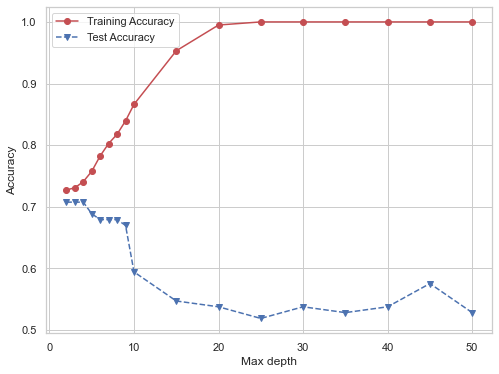

In [45]:
# Decision Tree

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
difference = 100.0
best_depth = 0

index = 0
for depth in maxdepths:
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    curr_difference = np.abs(trainAcc[index]-testAcc[index]) * 100.00
    if curr_difference < difference:
        difference = curr_difference
        print(depth)
        best_depth = depth
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", curr_difference, " %")
    index += 1

print('\n\n')
print('Best depth is ', best_depth)
clf = DecisionTreeClassifier(max_depth=best_depth)
clf = clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
print(classification_report(y_test, y_predTest))
#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [46]:
skfold = StratifiedKFold(n_splits=2)
clf = DecisionTreeClassifier(max_depth=3)
results = cross_val_score(clf, X, y, cv = skfold)
print(np.mean(results))

0.7201704545454546


K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.5188679245283019 , Difference =  48.113207547169814 %
K =  5 , Training Accuracy =  0.7357859531772575  Test Accuracy =  0.7075471698113207 , Difference =  2.823878336593677 %
K =  10 , Training Accuracy =  0.7274247491638796  Test Accuracy =  0.6886792452830188 , Difference =  3.874550388086073 %
K =  15 , Training Accuracy =  0.725752508361204  Test Accuracy =  0.7075471698113207 , Difference =  1.8205338549883265 %
K =  20 , Training Accuracy =  0.7274247491638796  Test Accuracy =  0.7075471698113207 , Difference =  1.987757935255885 %
K =  25 , Training Accuracy =  0.7274247491638796  Test Accuracy =  0.7075471698113207 , Difference =  1.987757935255885 %
K =  30 , Training Accuracy =  0.7274247491638796  Test Accuracy =  0.7075471698113207 , Difference =  1.987757935255885 %


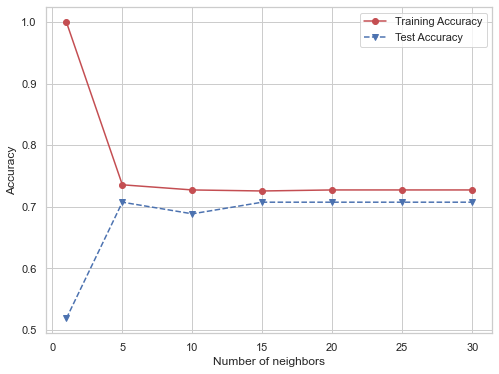

In [47]:
# KNN with Euclidean Distance Metric

numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

K =  1 , Training Accuracy =  1.0  Test Accuracy =  0.5094339622641509 , Difference =  49.056603773584904 %
K =  5 , Training Accuracy =  0.7474916387959866  Test Accuracy =  0.6792452830188679 , Difference =  6.824635577711868 %
K =  10 , Training Accuracy =  0.7224080267558528  Test Accuracy =  0.7075471698113207 , Difference =  1.4860856944532097 %
K =  15 , Training Accuracy =  0.725752508361204  Test Accuracy =  0.7075471698113207 , Difference =  1.8205338549883265 %
K =  20 , Training Accuracy =  0.7274247491638796  Test Accuracy =  0.7075471698113207 , Difference =  1.987757935255885 %
K =  25 , Training Accuracy =  0.7274247491638796  Test Accuracy =  0.7075471698113207 , Difference =  1.987757935255885 %
K =  30 , Training Accuracy =  0.7274247491638796  Test Accuracy =  0.7075471698113207 , Difference =  1.987757935255885 %


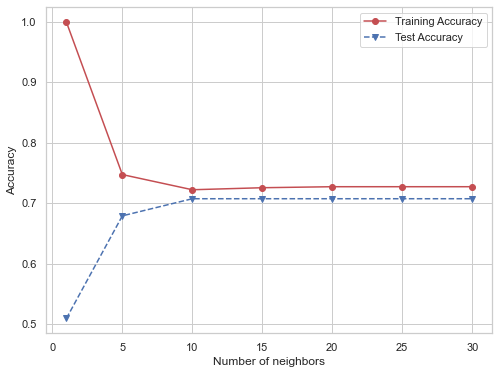

In [48]:
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc = []
testAcc = []

for k in numNeighbors:
    clf = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc.append(accuracy_score(y_train, y_predTrain))
    testAcc.append(accuracy_score(y_test, y_predTest))

plt.plot(numNeighbors, trainAcc, 'ro-', numNeighbors, testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

index = 0
for i in numNeighbors:
    print("K = ", numNeighbors[index], ", Training Accuracy = ", trainAcc[index], " Test Accuracy = ", testAcc[index],
          ", Difference = ", np.abs(trainAcc[index]-testAcc[index])*100, "%")
    index+=1

In [49]:
# Logistic Regression

clf = LogisticRegression(penalty = 'none')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with no regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print()

clf = LogisticRegression(penalty = 'l2')

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Logistic Regression with L2 regularization")
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Logistic Regression with no regularization
Train Accuracy:  0.7274247491638796
Test Accuracy:  0.7075471698113207

Logistic Regression with L2 regularization
Train Accuracy:  0.7274247491638796
Test Accuracy:  0.7075471698113207
              precision    recall  f1-score   support

    Moderate       0.71      1.00      0.83        75
        None       0.00      0.00      0.00        20
      Severe       0.00      0.00      0.00        11

    accuracy                           0.71       106
   macro avg       0.24      0.33      0.28       106
weighted avg       0.50      0.71      0.59       106



2
Depth =  2 , Training Accuracy =  0.7274247491638796 , Test Accuracy =  0.7075471698113207 , Diff =  1.987757935255885  %
Depth =  3 , Training Accuracy =  0.7274247491638796 , Test Accuracy =  0.7075471698113207 , Diff =  1.987757935255885  %
Depth =  4 , Training Accuracy =  0.7274247491638796 , Test Accuracy =  0.7075471698113207 , Diff =  1.987757935255885  %
Depth =  5 , Training Accuracy =  0.7357859531772575 , Test Accuracy =  0.7075471698113207 , Diff =  2.823878336593677  %
Depth =  6 , Training Accuracy =  0.7408026755852842 , Test Accuracy =  0.7075471698113207 , Diff =  3.3255505773963523  %
Depth =  7 , Training Accuracy =  0.7658862876254181 , Test Accuracy =  0.7075471698113207 , Diff =  5.833911781409739  %
Depth =  8 , Training Accuracy =  0.794314381270903 , Test Accuracy =  0.7075471698113207 , Diff =  8.676721145958233  %
Depth =  9 , Training Accuracy =  0.8344481605351171 , Test Accuracy =  0.7075471698113207 , Diff =  12.690099072379635  %
Depth =  10 , Trainin

Text(0, 0.5, 'Accuracy')

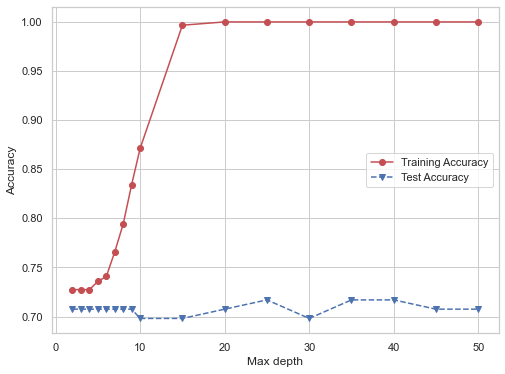

In [50]:
# Random Forest Classifier

maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
difference = 100.0
best_depth = 0

index = 0
for depth in maxdepths:
    clf = RandomForestClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_predTrain = clf.predict(X_train)
    y_predTest = clf.predict(X_test)
    trainAcc[index] = accuracy_score(y_train, y_predTrain)
    testAcc[index] = accuracy_score(y_test, y_predTest)
    curr_difference = np.abs(trainAcc[index]-testAcc[index]) * 100.00
    if curr_difference < difference:
        difference = curr_difference
        print(depth)
        best_depth = depth
    print("Depth = ", depth, ", Training Accuracy = ", trainAcc[index], ", Test Accuracy = ", testAcc[index],
          ", Diff = ", curr_difference, " %")
    index += 1

print('\n\n')
print('Best depth is ', best_depth)
clf = RandomForestClassifier(max_depth=best_depth)
clf = clf.fit(X_train, y_train)
y_predTrain = clf.predict(X_train)
y_predTest = clf.predict(X_test)
print(classification_report(y_test, y_predTest))
#########################################
# Plot of training and test accuracies
#########################################

plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Max depth')
plt.ylabel('Accuracy')

In [51]:
# Perception

clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.725752508361204
Test Accuracy:  0.7075471698113207
              precision    recall  f1-score   support

    Moderate       0.71      1.00      0.83        75
        None       0.00      0.00      0.00        20
      Severe       0.00      0.00      0.00        11

    accuracy                           0.71       106
   macro avg       0.24      0.33      0.28       106
weighted avg       0.50      0.71      0.59       106



In [52]:
# Multinomial Naive Bayes

clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.7274247491638796
Test Accuracy:  0.7075471698113207
              precision    recall  f1-score   support

    Moderate       0.71      1.00      0.83        75
        None       0.00      0.00      0.00        20
      Severe       0.00      0.00      0.00        11

    accuracy                           0.71       106
   macro avg       0.24      0.33      0.28       106
weighted avg       0.50      0.71      0.59       106



In [53]:
# SVC

clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_pred_train, y_train))
print("Test Accuracy: ", accuracy_score(y_pred_test, y_test))
print(classification_report(y_test, y_pred_test))

Train Accuracy:  0.7274247491638796
Test Accuracy:  0.7075471698113207
              precision    recall  f1-score   support

    Moderate       0.71      1.00      0.83        75
        None       0.00      0.00      0.00        20
      Severe       0.00      0.00      0.00        11

    accuracy                           0.71       106
   macro avg       0.24      0.33      0.28       106
weighted avg       0.50      0.71      0.59       106



In [54]:
# for the SVC classifier

print("Confusion Matrix for the Test Case")
print(metrics.confusion_matrix(y_test, y_pred_test))
print()
print("Classification Report")
print(metrics.classification_report(y_test, y_pred_test, digits = 3))

Confusion Matrix for the Test Case
[[75  0  0]
 [20  0  0]
 [11  0  0]]

Classification Report
              precision    recall  f1-score   support

    Moderate      0.708     1.000     0.829        75
        None      0.000     0.000     0.000        20
      Severe      0.000     0.000     0.000        11

    accuracy                          0.708       106
   macro avg      0.236     0.333     0.276       106
weighted avg      0.501     0.708     0.586       106



In [55]:
# plot roc curve

clf = SVC(gamma = 'auto', random_state = 0)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)

ValueError: SVC should be a binary classifier